In [66]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
import string
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import os

The code to run the algorithm to get accuracy on test folder emails is at the end, please run it to get the accuracy.

=================Preprocessing the data=========================

In [67]:
df=read_csv('mail_data.csv')

In [76]:
np.sum(label=='ham'),np.sum(label=='spam')

(4825, 747)

In [69]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [70]:
text=np.array(df['Message'])
label=np.array(df['Category'])

In [71]:
def ispunc(ch):
    '''
    Removes Punctuations from text'''
    punc='''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in punc:
        if(i==ch):
            return True
    return False
def find_in_features(features,word):
    n=features.size
    for i in range(n):
        if(features[i]==word):
            return i
    return -69  
def find_in_dict(Dict,word):
    for item in Dict:
        if(item==word):
            Dict[item]=Dict[item]+1
            return True
    Dict[word]=1
    return False

In [72]:
#Cleans the data and makes feature vectors of size 754.
data_cleaned=text.copy()
count=0
for emails in data_cleaned:
    data_cleaned[count]=''.join((z for z in emails if not (z.isdigit() or ispunc(z))))
    count=count+1
op=[]
for i in data_cleaned:
    op.append(list(i.split()))
vectorized_text=np.array(op,dtype=list)
Dict={}
for listt in vectorized_text:
    for i in listt:
        find_in_dict(Dict,i)
sorted_dt = {key: value for key, value in sorted(Dict.items(), key=lambda item: item[1])}
features=[]
count=0
for i,j in Dict.items():
    if(j>15):
        features.append(i)
        count=count+1
features=np.array(features)
n=text.size
final_mat=np.zeros((n,features.size))
for i in range(n):
    for j in vectorized_text[i]:
        temp=find_in_features(features,j)
        if(temp!=-69):
            final_mat[i,temp]=1

In [73]:
X_train, X_test, y_train, y_test = train_test_split(final_mat, label, test_size=0.2, random_state=42)

In [74]:
X_test.shape,X_train.shape,folder_test.shape

((1115, 754), (4457, 754), (12, 754))

In [17]:
number_of_spam=sum(y_train=='spam')
number_of_ham=y_train.size-number_of_spam

In [18]:
ham_in_test=np.sum(y_test=='ham')
spam_in_test=y_test.size-ham_in_test

In [19]:
final_mat=X_train
label=y_train

Reading data from a folder

In [61]:
list_of_files=os.listdir('test')

In [62]:
testt=np.array(range(len(list_of_files)),dtype=object)
count=0
for i in list_of_files:
    with open('test/'+i, 'r') as file:
        data=file.read().replace('\n', '')
        data=str(data)
        testt[count]=data
        count+=1

In [63]:
data_cleaned=testt.copy()
count=0
for emails in data_cleaned:
    data_cleaned[count]=''.join((z for z in emails if not (z.isdigit() or ispunc(z))))
    count=count+1
op=[]
for i in data_cleaned:
    op.append(list(i.split()))
    
vectorized_text=np.array(op,dtype=list)

Dict={}
for listt in vectorized_text:
    for i in listt:
        find_in_dict(Dict,i)
sorted_dt = {key: value for key, value in sorted(Dict.items(), key=lambda item: item[1])}


n=testt.size
folder_test=np.zeros((n,features.size))
for i in range(n):
    for j in vectorized_text[i]:
        temp=find_in_features(features,j)
        if(temp!=-69):
            folder_test[i,temp]=1

In [78]:
X_test=folder_test

===================Naive Bayes classifier==================

In [24]:
#defining proabilities
p_hat=number_of_spam/(number_of_ham+number_of_spam)


In [25]:
spam_features=final_mat[label=='spam']

In [26]:
ham_features=final_mat[label=='ham']

In [27]:
spam_p=np.sum(spam_features,axis=0)
ham_p=np.sum(ham_features,axis=0)

In [28]:
spam_features.shape,ham_features.shape,np.sum(spam_features,axis=0).shape,np.sum(ham_features,axis=0).shape

((598, 754), (3859, 754), (754,), (754,))

In [29]:
spam_p=spam_p/np.sum(spam_p)
ham_p=ham_p/np.sum(ham_p)

In [30]:
f=label=='ham'

In [31]:
final_mat[4,5]

0.0

In [32]:
#predicting and finding errors
n=y_train.size
f=label=='ham'
predicted=f.copy()
count=0
for i in range(n):
    pred_spam=p_hat
    pred_ham=1-p_hat
    pred=True
    for p in range(spam_p.size):
        pred_spam=pred_spam*((spam_p[p])**final_mat[i,p])*((1-spam_p[p])**(1-final_mat[i,p]))
        pred_ham=pred_ham*((ham_p[p])**final_mat[i,p])*((1-ham_p[p])**(1-final_mat[i,p]))
    #print(type(pred_ham),pred_ham)
    
    if(pred_spam>=pred_ham):
        pred=False
    if(f[i]!=pred):
        count=count+1
    predicted[i]=pred
print(count)

90


In [33]:
def stats(prediction,label,number_of_spam,number_of_ham):
    n=number_of_ham+number_of_spam
    s=number_of_spam-np.sum(prediction[label=='spam'])
    h=np.sum(prediction[label=='ham'])
    print("number of corrrectly predicted spam=",s," Percent ",(s)/number_of_spam*100)
    print("number of incorrrectly predicted spam=",number_of_spam-s," Percent ",(number_of_spam-s)/number_of_spam*100)
    print("Number of correctly predicted ham= ",h,"Percent",(h)/number_of_ham*100)
    print("Number of incorrectly predicted ham= ",number_of_ham-h,"Percent",(number_of_ham-h)/number_of_ham*100)
    print("Overall accuracy", (s+h)/n*100)

In [34]:
stats(predicted,y_train,number_of_spam,number_of_ham)

number of corrrectly predicted spam= 542  Percent  90.63545150501672
number of incorrrectly predicted spam= 56  Percent  9.364548494983277
Number of correctly predicted ham=  3825 Percent 99.11894273127754
Number of incorrectly predicted ham=  34 Percent 0.881057268722467
Overall accuracy 97.98070450975993


Test Accuracy

In [35]:
#predicting and finding errors
n=y_test.size
f=y_test=='ham'
predicted=f.copy()
count=0
for i in range(n):
    pred_spam=p_hat
    pred_ham=1-p_hat
    pred=True
    for p in range(spam_p.size):
        pred_spam=pred_spam*((spam_p[p])**X_test[i,p])*((1-spam_p[p])**(1-X_test[i,p]))
        pred_ham=pred_ham*((ham_p[p])**X_test[i,p])*((1-ham_p[p])**(1-X_test[i,p]))
    #print(type(pred_ham),pred_ham)
    
    if(pred_spam>=pred_ham):
        pred=False
    if(f[i]!=pred):
        count=count+1
    predicted[i]=pred

In [36]:
stats(predicted,y_test,spam_in_test,ham_in_test)

number of corrrectly predicted spam= 128  Percent  85.90604026845638
number of incorrrectly predicted spam= 21  Percent  14.093959731543624
Number of correctly predicted ham=  954 Percent 98.75776397515527
Number of incorrectly predicted ham=  12 Percent 1.2422360248447204
Overall accuracy 97.04035874439462


==========================KNN==================================

In [37]:
spam_features.shape,ham_features.shape,final_mat.shape

((598, 754), (3859, 754), (4457, 754))

In [38]:
for ii in range(1,2):
    print(ii)

1


In [45]:
len(k_s),n,final_mat.shape

(11, 4457, (4457, 754))

In [95]:
#error on training set
'''
n=y_train.size
k_s=[1,2,3,4,5,6,8,10,15,25,30]
p=len(k_s)
predicted=np.zeros(n)
eff=np.zeros(p)
for t in range(p):
    k=k_s[t]
    print(t)
    for i in range(n):
        y=label=='ham'
        point_a=final_mat[i,:]
        dist_matrix=np.zeros(n)
        for j in range(n):
            point_b=final_mat[j,:]
            dist=np.sum(abs(point_a-point_b))
            dist_matrix[j]=dist
        a=dist_matrix.argsort()
        dist_matrix=dist_matrix[a]
        y=y[a]
        count=0
        for o in range(1,k+1):
            count=count+y[o]
        count=count/k
        if(count>=0.5):
            predicted[i]=1
    s=number_of_spam-np.sum(predicted[label=='spam'])
    h=np.sum(predicted[label=='ham'])
    #print("number of corrrectly predicted spam=",s," Percent ",(s)/number_of_spam*100)
    #print("number of incorrrectly predicted spam=",number_of_spam-s," Percent ",(number_of_spam-s)/number_of_spam*100)
    #print("Number of correctly predicted ham= ",h,"Percent",(h)/number_of_ham*100)
    #print("Number of incorrectly predicted ham= ",number_of_ham-h,"Percent",(number_of_ham-h)/number_of_ham*100)
    eff[t]=(h+s)/n*100
'''

'\nn=y_train.size\nk_s=[1,2,3,4,5,6,8,10,15,25,30]\np=len(k_s)\npredicted=np.zeros(n)\neff=np.zeros(p)\nfor t in range(p):\n    k=k_s[t]\n    print(t)\n    for i in range(n):\n        y=label==\'ham\'\n        point_a=final_mat[i,:]\n        dist_matrix=np.zeros(n)\n        for j in range(n):\n            point_b=final_mat[j,:]\n            dist=np.sum(abs(point_a-point_b))\n            dist_matrix[j]=dist\n        a=dist_matrix.argsort()\n        dist_matrix=dist_matrix[a]\n        y=y[a]\n        count=0\n        for o in range(1,k+1):\n            count=count+y[o]\n        count=count/k\n        if(count>=0.5):\n            predicted[i]=1\n    s=number_of_spam-np.sum(predicted[label==\'spam\'])\n    h=np.sum(predicted[label==\'ham\'])\n    #print("number of corrrectly predicted spam=",s," Percent ",(s)/number_of_spam*100)\n    #print("number of incorrrectly predicted spam=",number_of_spam-s," Percent ",(number_of_spam-s)/number_of_spam*100)\n    #print("Number of correctly predicted

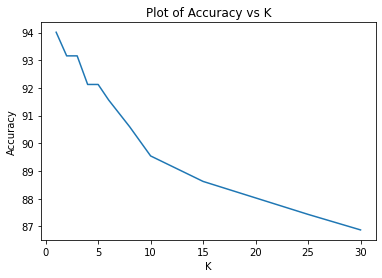

In [47]:
plt.plot(k_s,eff)
plt.title("Plot of Accuracy vs K")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.show()

In [48]:
assimpototic_accuracy=number_of_ham/n*100
assimpototic_accuracy

86.58290329818263

Best k value of based on cross validation is K=3

Test accuracy

In [49]:
y_test.size

1115

In [50]:
n=y_train.size
m=y_test.size
predicted=np.zeros(m)
k=2
for i in range(m):
    y=label=='ham'
    point_a=X_test[i,:]
    dist_matrix=np.zeros(n)
    for j in range(n):
        point_b=final_mat[j,:]
        dist=np.sum(abs(point_a-point_b))
        dist_matrix[j]=dist
    a=dist_matrix.argsort()
    dist_matrix=dist_matrix[a]
    y=y[a]
    count=0
    for o in range(1,k+1):
        count=count+y[o]
    count=count/k
    if(count>=0.5):
        predicted[i]=1

In [51]:
predicted.shape,m

((1115,), 1115)

In [52]:
stats(predicted,y_test,spam_in_test,ham_in_test)

number of corrrectly predicted spam= 64.0  Percent  42.95302013422819
number of incorrrectly predicted spam= 85.0  Percent  57.04697986577181
Number of correctly predicted ham=  960.0 Percent 99.37888198757764
Number of incorrectly predicted ham=  6.0 Percent 0.6211180124223602
Overall accuracy 91.83856502242152


 ========================Support vector machines=========================

In [53]:
clf = svm.SVC()

In [54]:
clf.fit(final_mat,label=='ham')

SVC()

In [55]:
final_mat[9,:].size

754

In [56]:
n=y_train.size
m=final_mat[9,:].size
prediction_svm=np.zeros(n)
for i in range(n):
    prediction_svm[i]=clf.predict(final_mat[i,:].reshape((1,m)))

In [57]:
stats(prediction_svm,label,number_of_spam,number_of_ham)

number of corrrectly predicted spam= 566.0  Percent  94.64882943143813
number of incorrrectly predicted spam= 32.0  Percent  5.351170568561873
Number of correctly predicted ham=  3859.0 Percent 100.0
Number of incorrectly predicted ham=  0.0 Percent 0.0
Overall accuracy 99.28202827013686


In [58]:
n=y_test.size
m=final_mat[9,:].size
prediction_svm=np.zeros(n)
for i in range(n):
    prediction_svm[i]=clf.predict(X_test[i,:].reshape((1,m)))

In [59]:
stats(prediction_svm,y_test,spam_in_test,ham_in_test)

number of corrrectly predicted spam= 120.0  Percent  80.53691275167785
number of incorrrectly predicted spam= 29.0  Percent  19.463087248322147
Number of correctly predicted ham=  965.0 Percent 99.89648033126294
Number of incorrectly predicted ham=  1.0 Percent 0.10351966873706005
Overall accuracy 97.30941704035875


===========\=\=\=\=\=\=\=======*=*=*=*=*=*=*=*==*==*=*==*=*=*=*=*=*=*======================
<br>TESTING ACCURACY ON DATA<br>
Run the below to directly get the accuracy values

In [81]:
#Creates feature vectors from the test data in a folder
list_of_files=os.listdir('test')
testt=np.array(range(len(list_of_files)),dtype=object)
count=0
for i in list_of_files:
    with open('test/'+i, 'r') as file:
        data=file.read().replace('\n', '')
        data=str(data)
        testt[count]=data
        count+=1
data_cleaned=testt.copy()
count=0
for emails in data_cleaned:
    data_cleaned[count]=''.join((z for z in emails if not (z.isdigit() or ispunc(z))))
    count=count+1
op=[]
for i in data_cleaned:
    op.append(list(i.split()))
    
vectorized_text=np.array(op,dtype=list)
Dict={}
for listt in vectorized_text:
    for i in listt:
        find_in_dict(Dict,i)
sorted_dt = {key: value for key, value in sorted(Dict.items(), key=lambda item: item[1])}
n=testt.size
folder_test=np.zeros((n,features.size))
for i in range(n):
    for j in vectorized_text[i]:
        temp=find_in_features(features,j)
        if(temp!=-69):
            folder_test[i,temp]=1
X_test=folder_test

In [89]:
def prediction_new(pred,lis):
    n=pred.size
    for i in range(n):
        print("The email ",lis[i]," is ",(1-pred[i]))

In [92]:
n=X_test.shape[0]
predicted=f.copy()
count=0
for i in range(n):
    pred_spam=p_hat
    pred_ham=1-p_hat
    pred=True
    for p in range(spam_p.size):
        pred_spam=pred_spam*((spam_p[p])**X_test[i,p])*((1-spam_p[p])**(1-X_test[i,p]))
        pred_ham=pred_ham*((ham_p[p])**X_test[i,p])*((1-ham_p[p])**(1-X_test[i,p]))
    #print(type(pred_ham),pred_ham)
    
    if(pred_spam>=pred_ham):
        pred=False
    if(f[i]!=pred):
        count=count+1
    predicted[i]=pred
prediction_new(prediction_svm,list_of_files)

The email  email1.txt  is  1.0
The email  email10.txt  is  1.0
The email  email11.txt  is  0.0
The email  email12.txt  is  0.0
The email  email2.txt  is  1.0
The email  email3.txt  is  0.0
The email  email4.txt  is  0.0
The email  email5.txt  is  0.0
The email  email6.txt  is  0.0
The email  email7.txt  is  0.0
The email  email8.txt  is  0.0
The email  email9.txt  is  1.0
